# The Setup

In this tutorial we use a special package called hiddenlayer.

It's very easy to install and serves as a way to visualize Pytorch graphs.

To install, use `pip install hiddenlayer`.

In [1]:
! pip install hiddenlayer

In [2]:
# Necessary imports
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import graphviz
import hiddenlayer as hl
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The dataset we use is the Bike Sharing Demand Dataset which you can get by registering [here](https://www.kaggle.com/c/bike-sharing-demand/data).

Now that we have the necessary things ready, let's get into the thick of it.

# The Data

In [0]:
data = pd.read_csv("train.csv", index_col = 0, nrows=1000)

For the sake of the tutorial we only use 1000 rows, but you can use the entire dataset!

In [4]:
data.shape

(1000, 11)

In [5]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


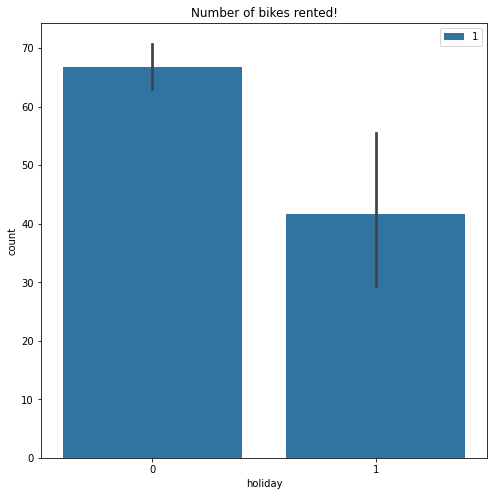

In [6]:
plt.figure(figsize=(8,8))
sns.barplot('holiday', 'count', hue='season', data=data)
plt.title("Number of bikes rented!")
plt.legend(loc="upper right")
plt.show()

I'm going to leave further exploration up to you, the reader. 

If you have any doubts on how to use `matplotlib` you can refer to [my  other tutorial on Matplotlib](https://rohitmidha23.github.io/Matplotlib-Explained/).

# The Dataloader

We will use only a few columns for the final features.

In [0]:
columns = ['season', 'holiday', 'workingday', 'weather', 'temp',
           'atemp', 'humidity', 'windspeed', 'casual', 'registered']

features = data[columns]

In [0]:
target = data["count"]

In [9]:
# Let's split the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 10) (800,)
(200, 10) (200,)


In [0]:
# Convert the data to torch tensors
train_x = torch.tensor(X_train.values, dtype=torch.float)
test_x = torch.tensor(X_test.values, dtype=torch.float)

train_y = torch.tensor(y_train.values, dtype=torch.float)
test_y = torch.tensor(y_test.values, dtype=torch.float)

In [0]:
# Load the data into pytorch required format
import torch.utils.data as data_utils
train_data = data_utils.TensorDataset(train_x, train_y)
train_loader = data_utils.DataLoader(train_data, batch_size=100, shuffle=True)

In [0]:
# To be able to use the data in batches, we use the `iter` function 
features_batch, target_batch = iter(train_loader).next()

In [13]:
print(features_batch.shape)

torch.Size([100, 10])


In [14]:
print(target_batch.shape)

torch.Size([100])


`features_batch` here represents one batch of the entire training data.

We had 1000 rows and we used `batch_size=100` hence `features_batch` has 100 rows as well.

# The Model

In [0]:
# Define some parameters
input_shape = train_x.shape[1]
output_shape = 1
hidden_layers = 10
loss_func = torch.nn.MSELoss()

In [0]:
# Define the model
model = torch.nn.Sequential(torch.nn.Linear(input_shape, hidden_layers),
                         torch.nn.Linear(hidden_layers, output_shape))

Notice how the output of first layer has the same shape as input to the second layer.

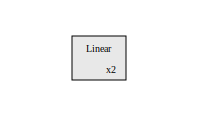

In [17]:
# Visualize the model using `hiddenlayer` package
hl.build_graph(model, torch.zeros([10, input_shape]))

It shows us that we have 2 Linear layers, just as we defined it!


We now need to define an optimizer. 

An optimizer is an object that is able to update all the models paramters using in built torch functionality. This is much easier to use than to manually update the weights ourselves!

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# The Training!

In [22]:
total_steps = len(train_loader)
num_epochs = 10000
for epoch in range(num_epochs + 1):
  for i, (inputs, target) in enumerate(train_loader): 
    # here features and target are one batch of the training data like explained above

    # perform a forward pass
    output = model(inputs)
    # calculate the loss
    loss = loss_func(output, target)

    # make the gradients zero
    optimizer.zero_grad()

    # backpropogate
    loss.backward()

    # update the parameters. Notice how simple it is here
    optimizer.step()

    if epoch % 2000 == 0:
      print("Epoch [{}/{}]: Step[{}/{}], Loss:{:.4f}"
              .format(epoch+1, num_epochs, i+1, total_steps, loss.item()))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10000]: Step[1/8], Loss:3282.0115
Epoch [1/10000]: Step[2/8], Loss:3065.8315
Epoch [1/10000]: Step[3/8], Loss:3550.5315
Epoch [1/10000]: Step[4/8], Loss:3244.2869
Epoch [1/10000]: Step[5/8], Loss:3749.1912
Epoch [1/10000]: Step[6/8], Loss:3523.2688
Epoch [1/10000]: Step[7/8], Loss:3556.7913
Epoch [1/10000]: Step[8/8], Loss:3748.4592
Epoch [2001/10000]: Step[1/8], Loss:3296.5720
Epoch [2001/10000]: Step[2/8], Loss:3847.5923
Epoch [2001/10000]: Step[3/8], Loss:2398.2815
Epoch [2001/10000]: Step[4/8], Loss:3496.5776
Epoch [2001/10000]: Step[5/8], Loss:4121.9551
Epoch [2001/10000]: Step[6/8], Loss:2642.0327
Epoch [2001/10000]: Step[7/8], Loss:3260.0356
Epoch [2001/10000]: Step[8/8], Loss:3707.0972
Epoch [4001/10000]: Step[1/8], Loss:3247.1775
Epoch [4001/10000]: Step[2/8], Loss:3465.2959
Epoch [4001/10000]: Step[3/8], Loss:2906.5935
Epoch [4001/10000]: Step[4/8], Loss:3023.2544
Epoch [4001/10000]: Step[5/8], Loss:2567.9910
Epoch [4001/10000]: Step[6/8], Loss:3718.7825
Epoch [4001/

# The Evaluation

To evaluate the model we switch to evaluation mode. 

This is because the `Dropout` and `BatchNormalization` layers have different models for evaluation and training.

In [0]:
model.eval()

# Predict on the test set
with torch.no_grad():
  # Anything inside `torch.no_grad()`
  # puts the `requires_grad` property to False.
  y_pred = model(test_x)

In [29]:
# convert the tensor to a numpy array
y_pred = y_pred.detach().numpy()
print(y_pred.shape)

(200, 1)


In [32]:
y_test.shape

(200,)

Both are the same shape so we can continue to evaluate the model.

To evaluate the model we use the r2 (r-square) score.

In [34]:
from sklearn.metrics import r2_score

print("R2 score: ", r2_score(y_test, y_pred))

R2 score:  0.028551743423591014


As you can see the R2 score is pretty bad (higher the better). 

Clearly we need to train our model for more number of epochs and also on the entire dataset. 

I leave that up to you to do.